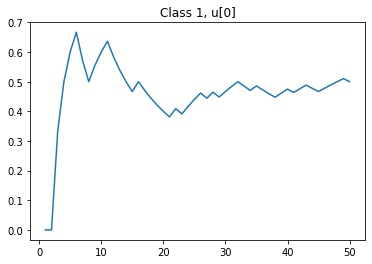

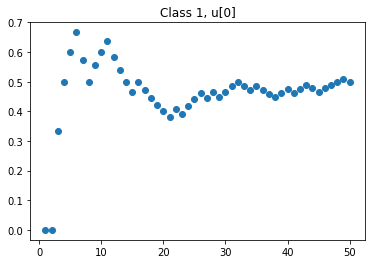

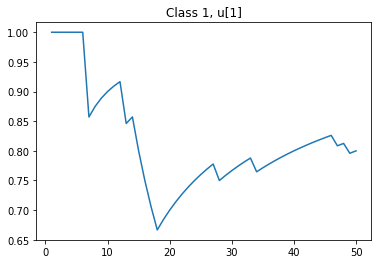

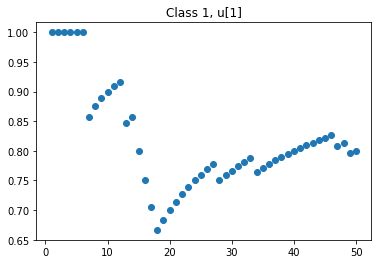

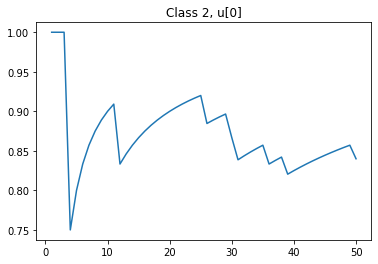

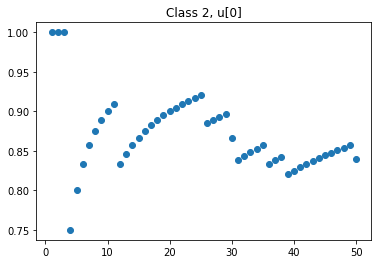

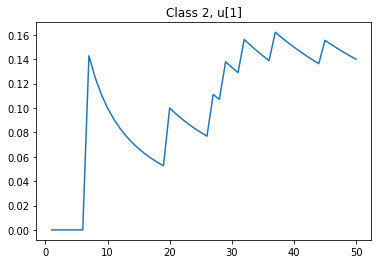

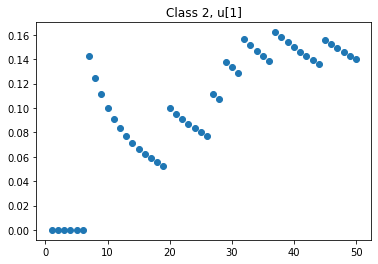

Correctly Classified in Class 1 Testing set: 39
Correctly Classified in Class 2 Testing set: 43


In [ ]:
# Classification based on discriminant analysis and MLE

# Generated 200 multivariate (dimension = 2) Bernoulli distributed samples, 100 of those
# samples (Class 1) were generated from (μ1=[ 0.5 0.8] ) and the other 100 (Class2) were
# generated from (μ2=[0.9 0.2 ]). Conditional independence was assumed.

# Selected 50 samples out of 100 samples from class 1, 
# and used those samples to compute the class conditional parameters ⇒ μ1. 
# Did the same for class 2.
# The remaining samples were used for classification.


from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import math

data1=[[0],[0]]
data1[0]= bernoulli.rvs(size=100,p=0.5)
data1[1]= bernoulli.rvs(size=100,p=0.8)

data2=[[0],[0]]
data2[0]= bernoulli.rvs(size=100,p=0.9)
data2[1]= bernoulli.rvs(size=100,p=0.2)


def calc(data,c,l):
  u=[];
  sum=0;
  x=[]
  for i in range(50):
    sum+=data[i]
    u.append((sum)/(i+1))
    x.append(i+1)

  Q1plot(u,x,c,l)
  return u[49]

def Q1plot(u,x,c,l):
  u=np.array(u)

  plt.plot(x,u)
  plt.title("Class "+str(c)+", u["+str(l)+"]")
  plt.show()

  plt.scatter(x,u)
  plt.title("Class "+str(c)+", u["+str(l)+"]")
  plt.show()


O11=calc(data1[0],1,0)
O12=calc(data1[1],1,1)
O21=calc(data2[0],2,0)
O22=calc(data2[1],2,1)

#Observeation: AS we increase n, u gets closer to the mean

def comp(O11,O12,O21,O22,x1,x2):
  g1=x1*math.log(O11) + (1-x1)*math.log(1-O11) + x2*math.log(O12) + (1-x2)*math.log(1-O12)
  g2=x1*math.log(O21) + (1-x1)*math.log(1-O21) + x2*math.log(O22) + (1-x2)*math.log(1-O22)

  if(g1>g2):
    return 1

  else:
    return 2

correct=0;
for i in range(50,99):
  ans=comp(O11,O12,O21,O22,data1[0][i],data1[1][i])
  if ans==1:
    correct=correct+1;

print("Correctly Classified in Class 1 Testing set: "+str(correct))

correct=0;
for i in range(50,99):
  ans=comp(O11,O12,O21,O22,data2[0][i],data2[1][i])
  if ans==2:
    correct=correct+1;

print("Correctly Classified in Class 2 Testing set: "+str(correct))